# COMP6252-Lecture1

In this lecture we introduce basic concepts that we will be using throughout COMP6252. This is done with the help of the simplest model. In this session you will learn

1. Supervised Learning
1. Loss function
1. Minimizing the loss function
1. Gradient descent
1. PyTorch Basics


## Prerequisites

This session assumes that you are familiar with basic calculus and Python. A good introduction to Python can be found in [Tutorial](https://docs.python.org/3/tutorial/)

## Supervised Learning - Regression

In supervised learning we are given a set of $n$ observations $\{(x_i,y_i),i=0,\ldots,n-1\}$, where $x$ and $y$ are the independent/dependent (possibly multidimensional) variables respectively. 

In a regression problem, the $y_i$'s are values in some subset of $R^n$, and we are asked to predict the value of $y$ corresponding to an arbitrary value of $x$.
In a classification problem, the $y_i$'s are labels in a discrete set $\{1\ldots n\}$, and we are asked to find the correct label (i.e. classify) $y$ for an arbitrary $x$

The underlying assumption is that there is some **unknown** function $h$ that maps the values of $x$ to values of $y$ and our task is to find an **approximation** for $h$.

In this session we will tackle a regression problem. The simplest model for approximating $h$ is a linear(in the unknown parameters) function $f(x)=\sum_k\beta_k\phi_k(x)$ where $\beta_k$ are parameters to be determined and $\phi$ are **known** functions.
For example, for a straight line, $\phi_0(x)=1$,$\phi_1(x)=x$ and we need to determine the **best** values of $\beta_0$ and $\beta_1$.

## Linear Regression

In this notebook we introduce the simplest of models: linear regression. The simplicity of the model and the fact that we can obtain a closed form solution makes an excellent example to illustrate concepts that will be used in the remainder of this module.

### Loss

The best values for the parameters are the ones that give us $y$ as close as possible to the observed values. One option is to choose the parameters that give us the **smallest** mean square error

\begin{align*}
L=\frac{1}{n}\sum_i\left(y_i -f(x_i)\right)^2
\end{align*}

From calculus, the minimum (for a convex function) occurs when the derivative is zero. Therefore, the best value for the parameters are the ones that make the derivative of the loss function zero. In other words, to find the best values for $\beta$ we need to solve the equation:

\begin{align*}
\frac{\partial f}{\partial\beta}=0
\end{align*}

Fortunately, for this simple model, we can obtain a solution in closed form

$$\begin{align*}\beta=(\Phi\Phi^T)^{-1}\Phi y\end{align*}$$

Where
$$\Phi_{ki}=\phi_k(x_i)$$


**Optional**: If you are interested in how the above result was obtained click on the arrow below.

<details>
<summary>Click here</summary>
Assume that the model is linear:

$$f(x,\beta)=\sum_k\beta_k\phi_k(x)$$

Then the loss function can be written as 
$$\begin{align*} L&=\sum_i \left(y_i-f(x_i)\right)^2\\&=\sum_i\left(y_i-\sum_k\beta_k\phi_k(x_i)\right)^2\end{align*}$$
taking the derivative with respect to parameter $\beta_l$ we get
$$\begin{align*}\frac{\partial L}{\partial\beta_l}&=\\
&=2\sum_i\left(\ y_i\sum_k\beta_k\phi_k(z_i)\right)\frac{\partial}{\partial\beta_l}\left(y_i-\sum_k\beta_k\phi_k(x_i)\right)\\
&=-2\sum_i\left(y_i -\sum_k\beta_k\phi_k(x_i)\right)\phi_l(x_i)\\
&=-2\sum_iy_i\phi_l(x_i)+2\sum_i\phi_l(x_i)\sum_k\beta_k\phi_k(x_i)
\end{align*}$$

To write the above in matrix form let $\Phi_{ki}=\phi_k(x_i)$ then
    
$$
\begin{align*}
\frac{\partial L}{\partial \beta_l}=-2\Phi y+2\Phi(\Phi^T\beta)
\end{align*}$$
    
    
setting the derivatives to zero we finally get
$$\Phi y=\Phi(\Phi^T\beta)$$
and solving for $\beta$
$$\beta=(\Phi\Phi^T)^{-1}\Phi y$$

</details>

### Special case: line model

In the special case of assuming the model is a straight line, i.e. $y=\beta_0+\beta_1 x$ we have  $\phi_0(x_i)=1$, $\phi_1(x_i)=x_i$.
Therefore the matrix $\Phi$ becomes:

\begin{bmatrix} 1 & 1 & \ldots & 1 \\ 
   x_0 & x_1 & \ldots & x_{n-1}
\end{bmatrix}





## Implementation in Python

In this section the special case of the straight line model is implemented in Python.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# generate 20 equidistant points
x=np.array([ i for i in range (1,20)])
x=x/np.max(x)
a=5.0
b=3.0
# generate y from x using a straight line, with some random noise
# use a slope of a (i.e. beta1) and intercept (i.e. beta0) of b
y=np.array([a*z+np.random.uniform()+b for z in x])
X=np.vstack((np.ones(x.shape[0]),x))
XT=X.T
# Compute product of X with X transpose
r=np.matmul(X,XT)
# Compute the inverse
rinv=np.linalg.inv(r)

In [3]:
beta=np.matmul(rinv,np.matmul(X,y))
closed_form=[beta[0]+beta[1]*x for x in x]
print(beta)


[3.49367484 4.84529706]


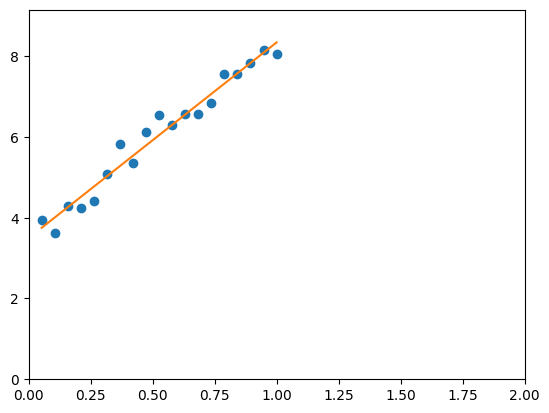

In [4]:

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(x,y,'o')
ax.plot(x,closed_form)
ax.set_xlim([0,np.max(x)+1])
ax.set_ylim([0,np.max(y)+1])
plt.show()

## Gradient Descent

In many situations the roots of the equation cannot be found in closed form. An alternative is to use **gradient descent**. The idea is to update the parameters in the opposite direction of the gradient. By iterating the procedure we hope to find the values of the parameters that make the gradient vanish.

The above strategy is illustrated in the figure below:
1. When the gradient is negative, $\beta$ needs to be **incremented**
2. When the gradient is positive, $\beta$ needs to be **decremented**

The question of **how much** to increment/decrement remains. From the figure below it is clear that a large increment/decrement would make the value of $\beta$ **overshoot** the minimum. This is why the increment/decrements are controlled by a **learning rate**. Therefore, for gradient descent, the parameters are updated using

\begin{align*}
\beta_{new}=\beta_{old}-rate\times\frac{\partial L}{\partial\beta}
\end{align*}


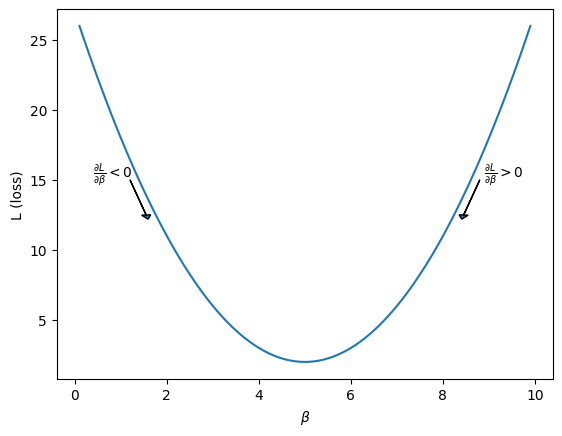

In [5]:
%matplotlib inline
v=[0.1*i for i in range(1,100)]
u=[(v-5)**2+2 for v in v]
fig,ax=plt.subplots()
ax.plot(v,u)
ax.arrow(8.8,15,-0.35,-2.5,head_width=0.2)
ax.arrow(1.2,15,0.35,-2.5,head_width=0.2)
ax.text(0.4,15.2,r"$\frac{\partial L}{\partial\beta}<0$")
ax.text(8.9,15.2,r"$\frac{\partial L}{\partial\beta}>0$")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"L (loss)")
plt.show()


In [9]:

beta=np.random.uniform(size=(2))
path=[]
def gradient(beta):
    a=-2*np.matmul(X,y)
    b=2*np.matmul(X,np.matmul(XT,beta))
    return a+b

rate=0.01
for i in range(200):
    db=gradient(beta)
    beta=beta-rate*db
    if(i%10==0):
        path.append(beta)
print(beta)


[3.50202427 4.83045037]


<IPython.core.display.Javascript object>


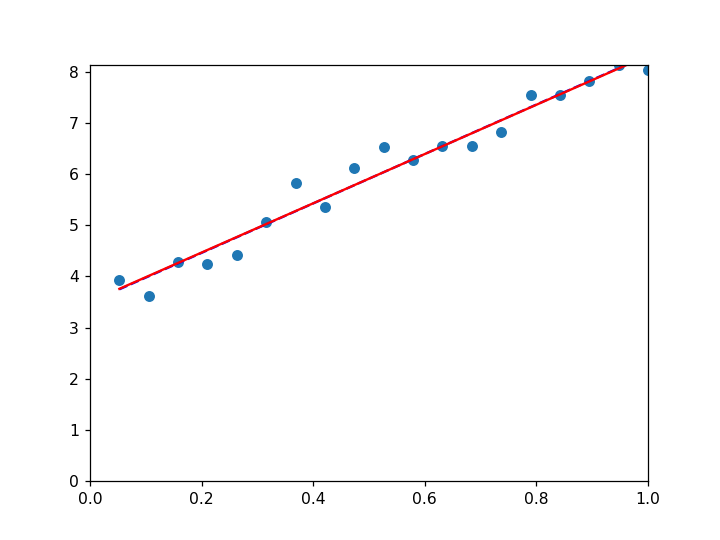

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [12]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig,ax=plt.subplots()
def line(p,x):
    return [p[0]+p[1]*x for x in x]

def animate(i):
    #print("i is {}".format(i))
    ax.clear()
    ax.plot(x,y,'o')
    ax.plot(x,closed_form,'--',color='blue')
    ax.plot(x,line(path[i],x),color='red')
    ax.set_xlim([0,np.max(x)])
    ax.set_ylim([0,np.max(y)])

an=FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()

In [11]:
# in case the previous code doesn't work
from IPython.display import Video

Video('gd-animation.mp4',embed=True)

## Using PyTorch
In this section we will repeat the same computation as in the last one, but using PyTorch.
This allows us to introduce PyTorch concepts and terminologies to an already solved problem.
First we introduce some basic types used by PyTorch.

### PyTorch basics

The basic type in PyTorch that we will be using is a ```tensor```. According to [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html) a ```tensor``` is a multidimensional matrix containing elements of a single data type.


In [8]:

# A (1x2)=dim tensor
b=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float64)
print("b={}".format(b))
print("b has dimensions {}".format(b.shape))
#torch.Size() is iterable so we can create a list or tuple
print("b has dimensions {}".format(tuple(b.shape)))

# A 0-dim tensor
a=torch.tensor(1,dtype=torch.float32)
print(a)
print(a.shape)
# use .item() to extract a scalar from a 0-d tensor
print("single value in a is {}".format(a.item()))

NameError: name 'torch' is not defined

#### Useful functions on tensors

In [ ]:
# Create a tensor of dimensions (2,3) whose values are all zeros 
a=torch.zeros([2,3])
print(a)
# Same as above but filled with ones
a=torch.ones([4,2])
print(a)
# Same as above but filled with random values from a uniform distribution over [0,1] 
# https://pytorch.org/docs/stable/generated/torch.rand.html
# See also randn for a normal distribution
#https://pytorch.org/docs/stable/generated/torch.randn.html
a=torch.rand([2,3])
print(a)
# A tensor filled with ones that has the same dimensions as tensor a
b=torch.ones_like(a)
print(b)

# Transpose a tensor
a=torch.tensor([[1,2,3],[4,5,6]])
print("a=")
print(a)
print("transpose of a=")
print(a.transpose(0,1))

## Computing the gradient

When using PyTorch, a explicit form for the gradient is not necessary. PyTorch can compute the gradient of any loss function with respect to the parameters using the ```autograd.grad``` function ([docs](https://pytorch.org/docs/stable/generated/torch.autograd.grad.html)).

Other than that, the parameters, the tensors with respect to which we need to compute the gradient, should have```requires_grad=True```

In [ ]:
# A PyTorch tensor is more than a mathematical tensor containing data
# It is an object that includes properties that allows PyTorch to perform differentiation 
# with respect to tensors

import torch
import torch.autograd as autograd
rate=0.1
tensor_X=torch.tensor(X,dtype=torch.float32)
tensor_y=torch.tensor(y,dtype=torch.float32)
tensor_XT=torch.transpose(tensor_X,0,1)

# To be able to compute the gradient with respect to beta
tensor_beta=torch.rand(2,requires_grad=True)

### Gradient descent

In [ ]:
for i in range(200):
    # mean square error
    loss=torch.dot(tensor_y-torch.matmul(tensor_beta,tensor_X),tensor_y-torch.matmul(tensor_beta,tensor_X))/tensor_y.size()[0]
    # compute the gradient of the loss function wrt tensor_beta
    db=autograd.grad(loss,tensor_beta)
    # update tensor_beta according to the gradient values
    # grad always returns a tuple, even if it contains a single element
    tensor_beta.data-=rate*db[0]
print(tensor_beta)